In [7]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=False)
matplotlib.rcParams['svg.fonttype'] = 'none'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

sys.path.insert(0, '/projects/ps-yeolab3/bay001/software/stable_code/rbp-maps/maps/')
from density import Map
from density import ReadDensity
from density import normalization_functions
from density import RDPlotter
from density import LineObject as dline
from peak import LineObject as pline
from peak import PeakPlotter


sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4)

sns.palplot(sns.color_palette("hls", 16))
colors = sns.color_palette("hls", 16)
density_colors = [colors[0], colors[15]]
fivep_density_colors = [colors[8], colors[9]]


ImportError: No module named plotter

In [3]:
density_dir = '/projects/ps-yeolab3/bay001/maps/current/se_zscore'

"""density_included = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '204_01_RBFOX2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '218_01_TRA2A.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')
"""

density_included = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.U2AF2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.U2AF2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass = os.path.join(density_dir, '272_01_U2AF2.merged.r2.1.HepG2_native_cassette_exons.normed_matrix.txt')



In [4]:
density_5p_dir = '/projects/ps-yeolab3/bay001/maps/current/se_5p/'

"""density_included_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.RBFOX2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '204_01_RBFOX2.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')

density_included_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.TRA2A-BGHLV14-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '218_01_TRA2A.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')
"""

density_included_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.U2AF2-BGHLV26-HepG2-included-upon-knockdown.normed_matrix.txt')
density_excluded_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.U2AF2-BGHLV26-HepG2-excluded-upon-knockdown.normed_matrix.txt')
density_native_cass_5p = os.path.join(density_5p_dir, '272_01_U2AF2.merged.r2.5.1.HepG2_native_cassette_exons.normed_matrix.txt')


In [5]:
density_incl = dline.LineObject(
    event_matrix=pd.read_table(density_included, sep=',', index_col=0),
    annotation='Included upon knockdown',
    conf=0.95,
    color=density_colors[0], # blueish
    min_event_threshold=100
)
density_excl = dline.LineObject(
    event_matrix=pd.read_table(density_excluded, sep=',', index_col=0),
    annotation='Excluded upon knockdown',
    conf=0.95,
    color=density_colors[1], # reddish
    min_event_threshold=100
)
density_incl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_included_5p, sep=',', index_col=0),
    annotation='Included upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[0], # blueish
    min_event_threshold=1000000
)
density_excl_5p = dline.LineObject(
    event_matrix=pd.read_table(density_excluded_5p, sep=',', index_col=0),
    annotation='Excluded upon knockdown (5p)',
    conf=0.95,
    color=fivep_density_colors[1], # reddish
    min_event_threshold=1000000
)

((796, 1400), 'Included upon knockdown (796 events)')
((2285, 1400), 'Excluded upon knockdown (2285 events)')
((796, 1400), 'Included upon knockdown (5p) (796 events)')
((2285, 1400), 'Excluded upon knockdown (5p) (2285 events)')


/home/bay001/anaconda2/envs/brian/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


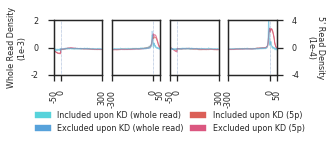

In [6]:
import matplotlib.patches as mpatches

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(4, 1))

axs = [ax1, ax2, ax3, ax4]

ax5 = ax1.twinx()
ax6 = ax2.twinx()
ax7 = ax3.twinx()
ax8 = ax4.twinx()

paxs = [ax5, ax6, ax7, ax8]

fontsize = 8
    
# ax1.set_ylim(-0.001, 0.001)

RDPlotter.plot_se([density_incl, density_excl], axs, fivep_density_colors ) # density_bg
RDPlotter.plot_se([density_incl_5p, density_excl_5p], paxs, density_colors)

ax1.set_ylabel("Whole Read Density\n(1e-3)", size=fontsize)
ax5.yaxis.set_visible(False)
ax8.yaxis.set_visible(True)
ax8.set_ylabel("5' Read Density\n(1e-4)", rotation=270, size=fontsize)
ax8.yaxis.tick_right()
ax8.yaxis.set_label_coords(2, 0.5)

ax1_ytick_min = -0.002
ax1_ytick_max = 0.002

ax8_ytick_min = -0.0004
ax8_ytick_max = 0.0004

for ax in axs:
    ax.set_ylim(ax1_ytick_min, ax1_ytick_max)
    ax.tick_params(labelsize=fontsize)
    try:
        ax.legend_.remove()
    except AttributeError:
        pass
    
for ax in paxs:
    ax.set_ylim(ax8_ytick_min, ax8_ytick_max)
    ax.tick_params(labelsize=fontsize)
    try:
        ax.legend_.remove()
    except AttributeError:
        pass
    
ax1.yaxis.set_ticks([ax1_ytick_min,0,ax1_ytick_max])
ax8.yaxis.set_ticks([ax8_ytick_min,0,ax8_ytick_max])

ax1.yaxis.set_ticklabels([-2,0,2])
ax8.yaxis.set_ticklabels([-4,0,4])

incl_density_patch = mpatches.Patch(color=density_colors[0], label='Included upon KD (5p)')
excl_density_patch = mpatches.Patch(color=density_colors[1], label='Excluded upon KD (5p)')
incl_density_patch_5p = mpatches.Patch(color=fivep_density_colors[0], label='Included upon KD (whole read)')
excl_density_patch_5p = mpatches.Patch(color=fivep_density_colors[1], label='Excluded upon KD (whole read)')

leg = axs[0].legend(
    bbox_to_anchor=(2.75, -0.6), loc=1, mode="expand",
    handles=[incl_density_patch, excl_density_patch, incl_density_patch_5p, excl_density_patch_5p],
    borderaxespad=0., ncol=2, fontsize=fontsize
)
# f.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/204_01_RBFOX2_whole_vs_5p_read_density.svg')
f.savefig('/home/bay001/projects/gabe_qc_20170612/analysis/272_01_U2AF2_whole_vs_5p_read_density.svg')